# **0. Initial**
### Import lib

In [217]:
import utils
from utils import *

import importlib
importlib.reload(utils)

import utils
from utils import *

### Prepare directory name

In [218]:
num_ex = 11
num_seed = 5
root_dir = '/home/natcha/github/legged_navigation/logs/anymal_c_nav/'

list_experiment_name = ["run_0{}".format(i) if i < 10 else "run_{}".format(i) for i in range(1, num_ex+1)]

print("Experiment name: {}".format(list_experiment_name))
print("Directory: {}".format(root_dir))

dict_folder_dir = defaultdict(dict)
for ex_name in list_experiment_name:
    for seed in range(1, num_seed+1):
        folder_name = "{}_0{}".format(ex_name, seed)
        name_folder = [f + '/' for f in os.listdir(root_dir) if folder_name in f]
        folder_dir = root_dir+name_folder[-1]
        dict_folder_dir[ex_name][seed] = folder_dir

        print("Found: {}".format(folder_dir))

Experiment name: ['run_01', 'run_02', 'run_03', 'run_04', 'run_05', 'run_06', 'run_07', 'run_08', 'run_09', 'run_10', 'run_11']
Directory: /home/natcha/github/legged_navigation/logs/anymal_c_nav/
Found: /home/natcha/github/legged_navigation/logs/anymal_c_nav/May22_21-09-07_run_01_01/
Found: /home/natcha/github/legged_navigation/logs/anymal_c_nav/May22_21-42-58_run_01_02/
Found: /home/natcha/github/legged_navigation/logs/anymal_c_nav/May22_22-16-26_run_01_03/
Found: /home/natcha/github/legged_navigation/logs/anymal_c_nav/May22_22-49-50_run_01_04/
Found: /home/natcha/github/legged_navigation/logs/anymal_c_nav/May22_23-23-42_run_01_05/
Found: /home/natcha/github/legged_navigation/logs/anymal_c_nav/May23_00-37-13_run_02_01/
Found: /home/natcha/github/legged_navigation/logs/anymal_c_nav/May23_01-10-19_run_02_02/
Found: /home/natcha/github/legged_navigation/logs/anymal_c_nav/May23_01-43-35_run_02_03/
Found: /home/natcha/github/legged_navigation/logs/anymal_c_nav/May23_02-16-49_run_02_04/
Fou

### load training log

In [219]:
dict_training_logs = defaultdict(dict)
for ex_name in list_experiment_name:
    for seed in range(1, num_seed+1):
        dict_training_logs[ex_name][seed] = load_log(dict_folder_dir[ex_name][seed], mode="training")
    
a =list(dict_training_logs[list_experiment_name[-1]][1].keys())
print("Keys of log", *a, sep = "\n ")

Keys of log
 action_rate
 ang_vel_xy
 collision
 dof_acc
 feet_air_time
 guide
 lin_vel_z
 reach_goal
 stall
 torques
 tracking_height
 tracking_position
 sum_reward
 guide_reward_active
 reach_goal_percent
 step_count
 iteration
 iteration_runner
 mean_value_loss
 mean_surrogate_loss
 mean_action_noise
 mean_reward
 mean_episode_length


### Define run name

In [220]:
# run_idx = { 1: "run01",
#             2: "run02",
#             3: "run03",         #
#             4: "run04",
#             5: "run05",       #
#             6: "run06",
#             7: "run07",         #
#             8: "run08",
#             9: "run09",
#             10: "run10",
#             11: "run11",         #
#             12: "run12",
#             13: "run13"}

# all_legends = { "run01": "Base",
#                 "run02": "Absolute Pos",
#                 "run03": "Reach terminate",         #
#                 "run04": "No curriculum",
#                 "run05": "No reach goal rew",       #
#                 "run06": "No stall rew",
#                 "run07": "No tracking rew",         #
#                 "run08": "Guide only first iter",
#                 "run09": "Guide 60%",
#                 "run10": "Base",
#                 "run11": "Reach terminate",         #
#                 "run12": "No reach goal rew",
#                 "run13": "No tracking rew"}

run_idx = { 1: "run_01",
            2: "run_02",
            3: "run_03",        
            4: "run_04",
            5: "run_05",      
            6: "run_06",
            7: "run_07",        
            8: "run_08",
            9: "run_09",
            10: "run_10",
            11: "run_11"}

all_legends = { "run_01": "Base",
                "run_02": "Without curriculum",
                "run_03": "No reach goal",        
                "run_04": "No stall",
                "run_05": "No tracking",      
                "run_06": "Remove first iter",
                "run_07": "Guide 60%",        
                "run_08": "Guide 80%",
                "run_09": "No guide",
                "run_10": "Remove 50%",
                "run_11": "Without curriculum"}

def select_legends(list_run_idx:list):
    legends = {}
    for i in list_run_idx:
        legends[run_idx[i]] = all_legends[run_idx[i]]
    return legends

### load playing log

# **1. During Training**
## 1.1 Absolute vs Relative Position
### Mean reward

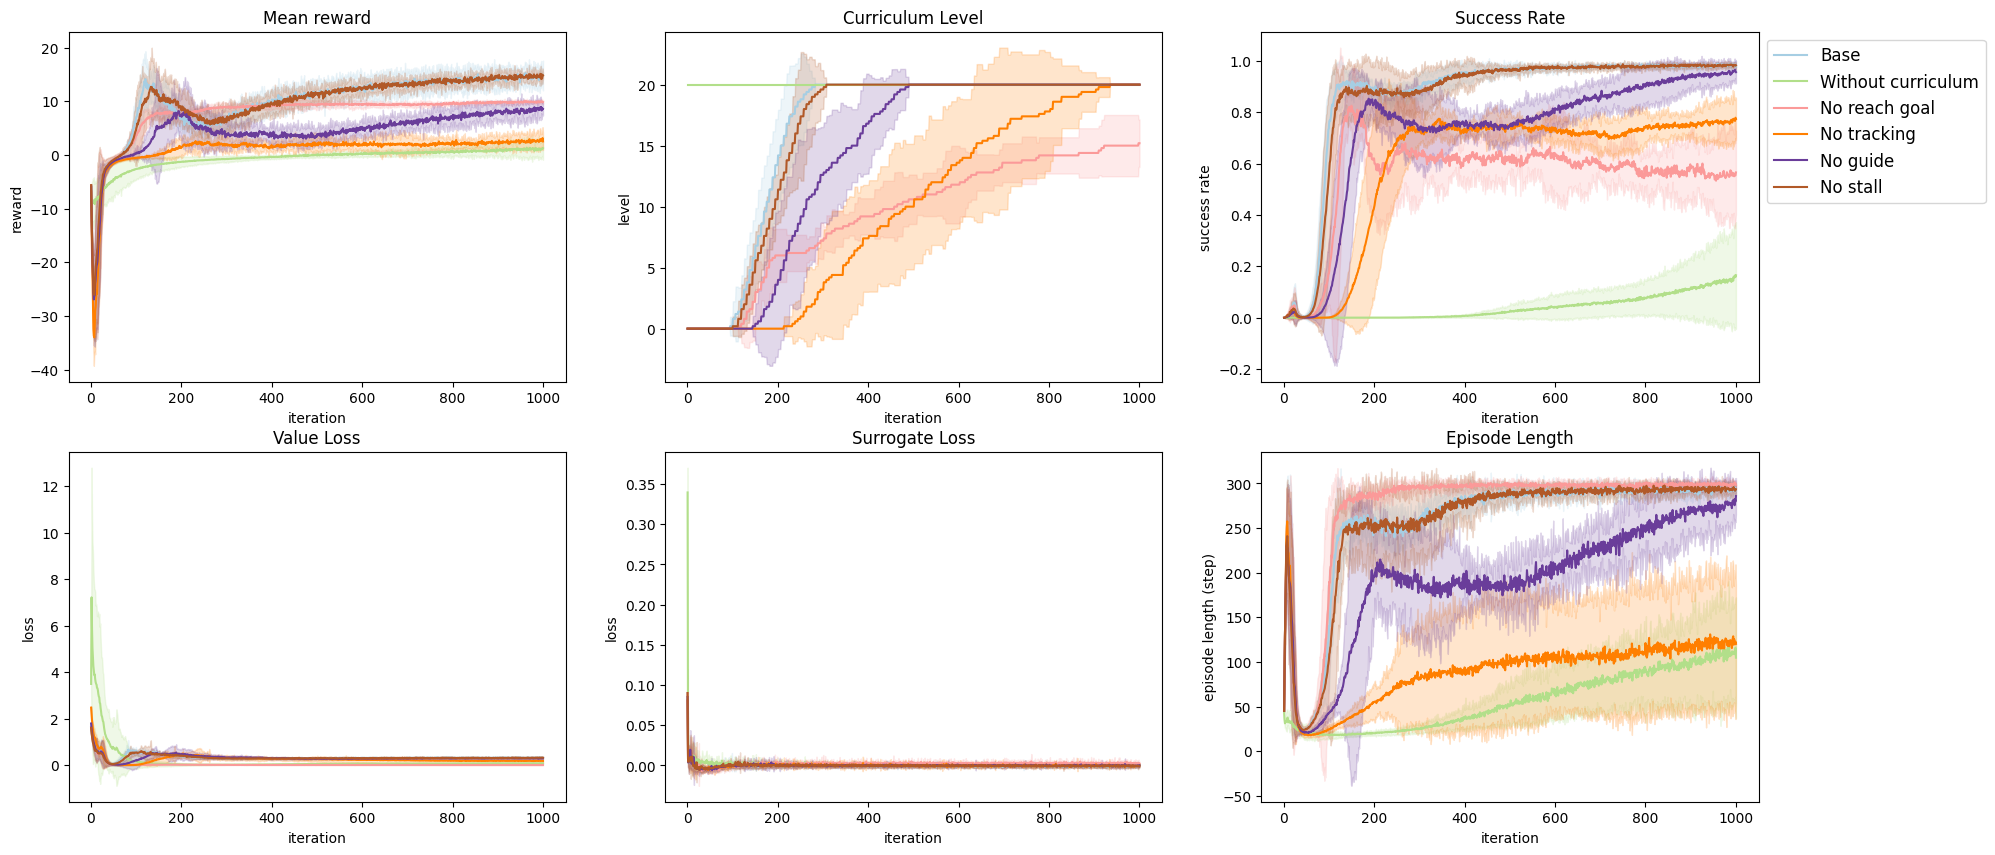

In [221]:
import utils
from utils import *

import importlib
importlib.reload(utils)

import utils
from utils import *

legends = select_legends([1, 11, 3, 5, 9, 4])
selected_plot = select_legends([1, 11, 3, 5, 9, 4])
list_ex_names = list(legends.keys())
active_plot = list(selected_plot.keys())

base_plot(dict_training_logs, 
          list_ex_names=list_ex_names, 
          legends=legends, 
          num_seed=num_seed,
          active_plot=active_plot,
          show_legend=True)

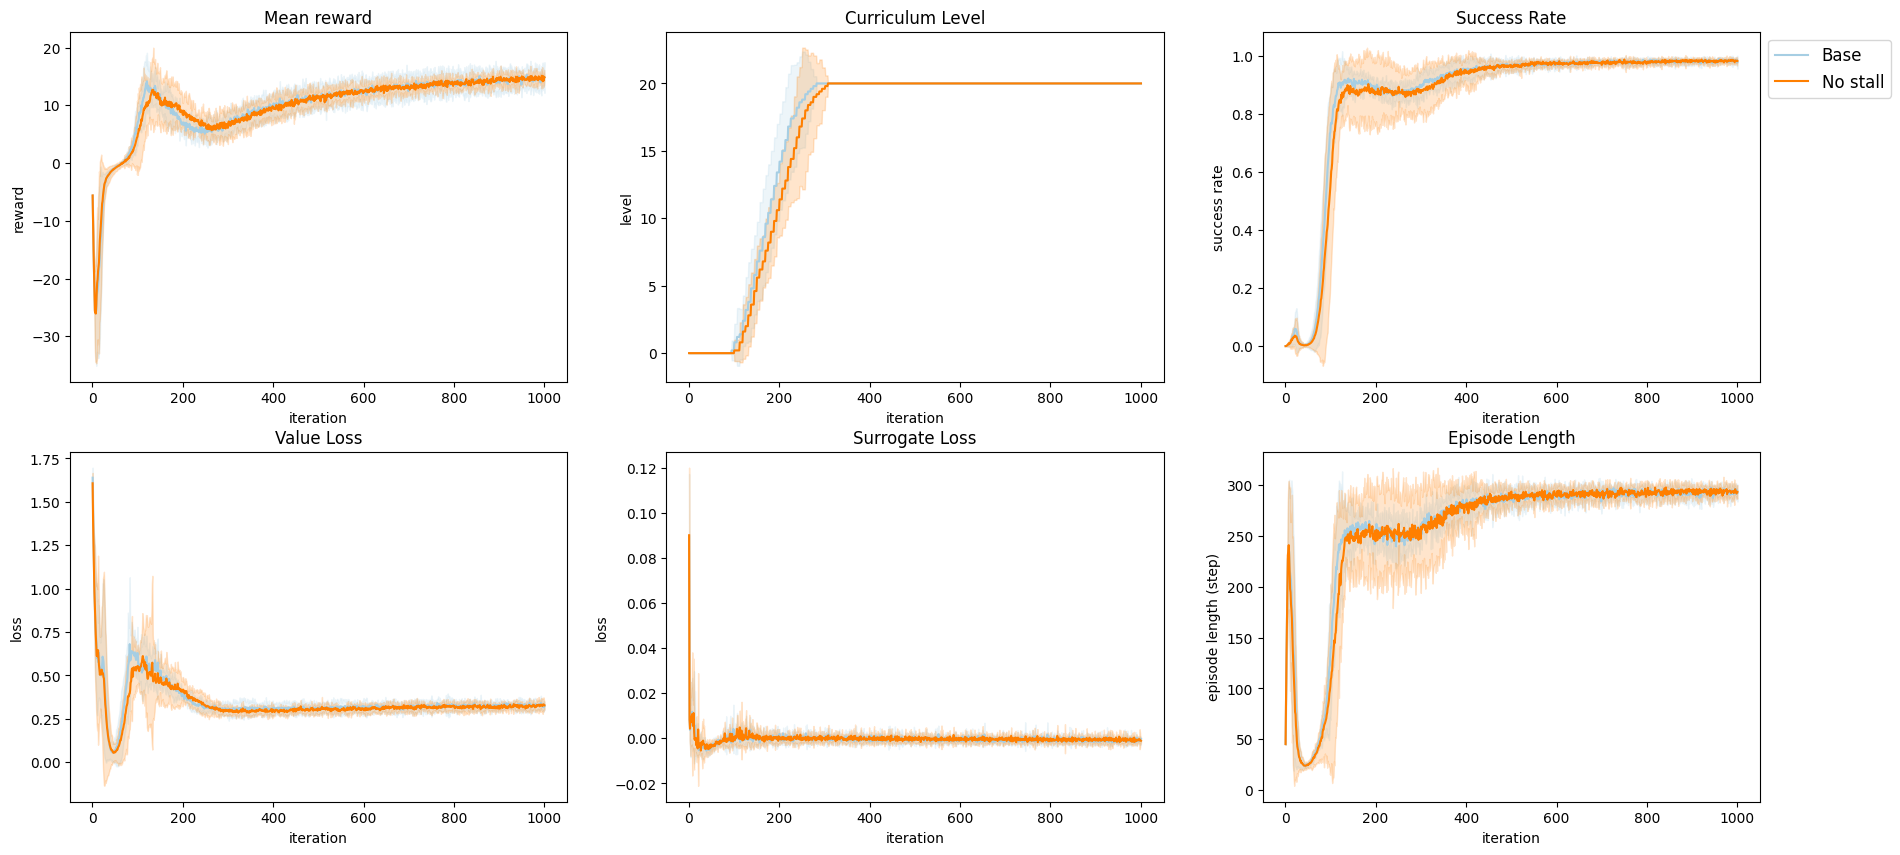

In [222]:
legends = select_legends([1, 2, 3, 4, 5, 9])
selected_plot = select_legends([1, 4])
list_ex_names = list(legends.keys())
active_plot = list(selected_plot.keys())

base_plot(dict_training_logs, 
          list_ex_names=list_ex_names, 
          legends=legends, 
          num_seed=num_seed,
          active_plot=active_plot,
          show_legend=True)

In [223]:
iteration = 0

for i in range(1, 6):
    print(len(dict_training_logs["run_06"][i]["guide"]))
    iteration += len(dict_training_logs["run_10"][i]["guide"])

print(iteration / 5)

1
1
1
1
1
88.0


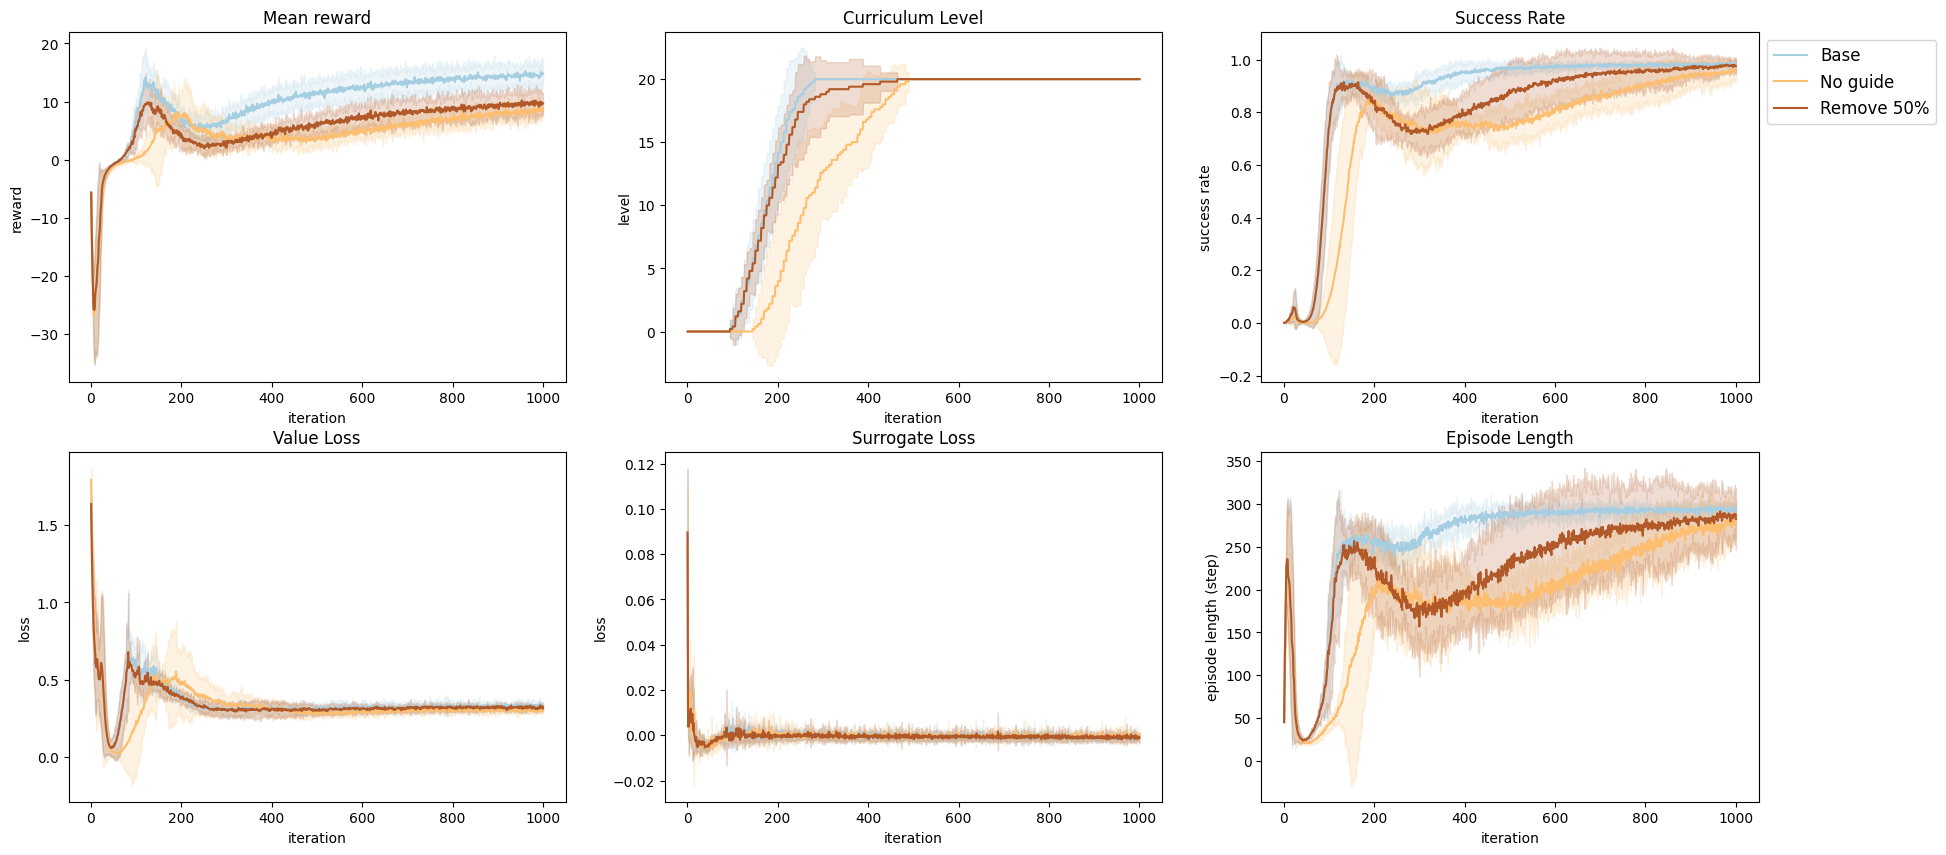

In [224]:
legends = select_legends([1, 9, 10])
selected_plot = select_legends([1, 9, 10])
list_ex_names = list(legends.keys())
active_plot = list(selected_plot.keys())

base_plot(dict_training_logs, 
          list_ex_names=list_ex_names, 
          legends=legends, 
          num_seed=num_seed,
          active_plot=active_plot,
          show_legend=True)

# **2. Post-training**

In [225]:
dict_playing_logs = defaultdict()
for ex_name in [list_experiment_name[0]]:
    # select only seed
    dict_playing_logs[ex_name] = load_log(dict_folder_dir[ex_name][1], mode="playing")
    
a =list(dict_playing_logs[list_experiment_name[0]].keys())
print("Keys of log", *a, sep = "\n ")

Keys of log
 dt
 num_samples
 dof_pos_target
 dof_pos
 dof_vel
 dof_torque
 command_x
 command_y
 command_z
 base_roll
 base_pitch
 base_yaw
 base_pos_x
 base_vel_x
 base_vel_y
 base_vel_z
 base_vel_yaw
 contact_forces_z
 robot_x
 robot_y
 robot_z


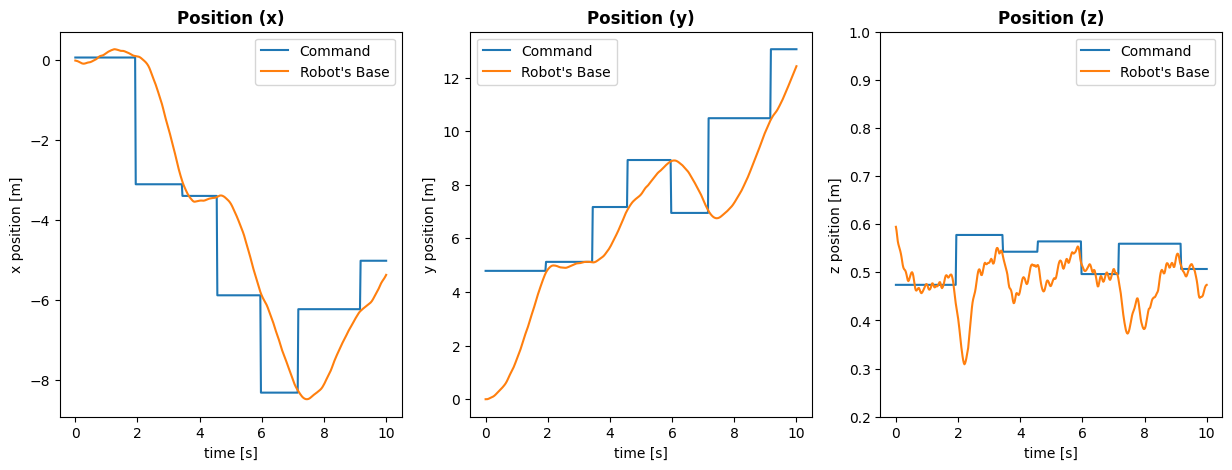

In [226]:
selected_idx = 1
run_plot = run_idx[selected_idx]
run_label = select_legends([selected_idx])[run_plot]

plot_navigation(dict_playing_logs, run_name=run_plot, run_label='Robot\'s Base')